In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [32]:
df = pd.read_excel('../../dataset/DATA_RUMAH.xlsx')
df

,NO,NAMA RUMAH,HARGA,LT,LB,KT,KM,GRS
0,1,"Rumah Murah Hook Tebet Timur, Tebet, Jakarta S...",3800000000,220,220,3,3,0
1,2,"Rumah Modern di Tebet dekat Stasiun, Tebet, Ja...",4600000000,180,137,4,3,2
2,3,"Rumah Mewah 2 Lantai Hanya 3 Menit Ke Tebet, T...",3000000000,267,250,4,4,4
3,4,"Rumah Baru Tebet, Tebet, Jakarta Selatan",430000000,40,25,2,2,0
4,5,"Rumah Bagus Tebet komp Gudang Peluru lt 350m, ...",9000000000,400,355,6,5,3
...,...,...,...,...,...,...,...,...
1005,1006,Rumah Strategis Akses Jalan 2mobil Di Menteng ...,9000000000,450,550,10,10,3
1006,1007,Tebet Rumah Siap Huni Jln 2 Mbl Nyaman,4000000000,160,140,4,3,2
1007,1008,"Di Kebun Baru Rumah Terawat, Area Strategis",4000000000,139,230,4,4,1
1008,1009,Dijual Cepat Rumah Komp Depkeu Dr Soepomo Tebe...,19000000000,360,606,7,4,0


In [33]:
df.describe(include='all').round(2)

,NO,NAMA RUMAH,HARGA,LT,LB,KT,KM,GRS
count,1010.00,1010,1.010000e+03,1010.00,1010.00,1010.00,1010.00,1010.00
unique,NaN,949,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,"4 Bedrooms House Tebet, Jakarta Selatan, DKI J...",NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,15,NaN,NaN,NaN,NaN,NaN,NaN
mean,505.50,NaN,7.628987e+09,276.54,237.43,4.67,3.61,1.92
std,291.71,NaN,7.340946e+09,177.86,179.96,1.57,1.42,1.51
min,1.00,NaN,4.300000e+08,40.00,25.00,2.00,1.00,0.00
25%,253.25,NaN,3.262500e+09,150.00,130.00,4.00,3.00,1.00
50%,505.50,NaN,5.000000e+09,216.50,165.00,4.00,3.00,2.00
75%,757.75,NaN,9.000000e+09,350.00,290.00,5.00,4.00,2.00


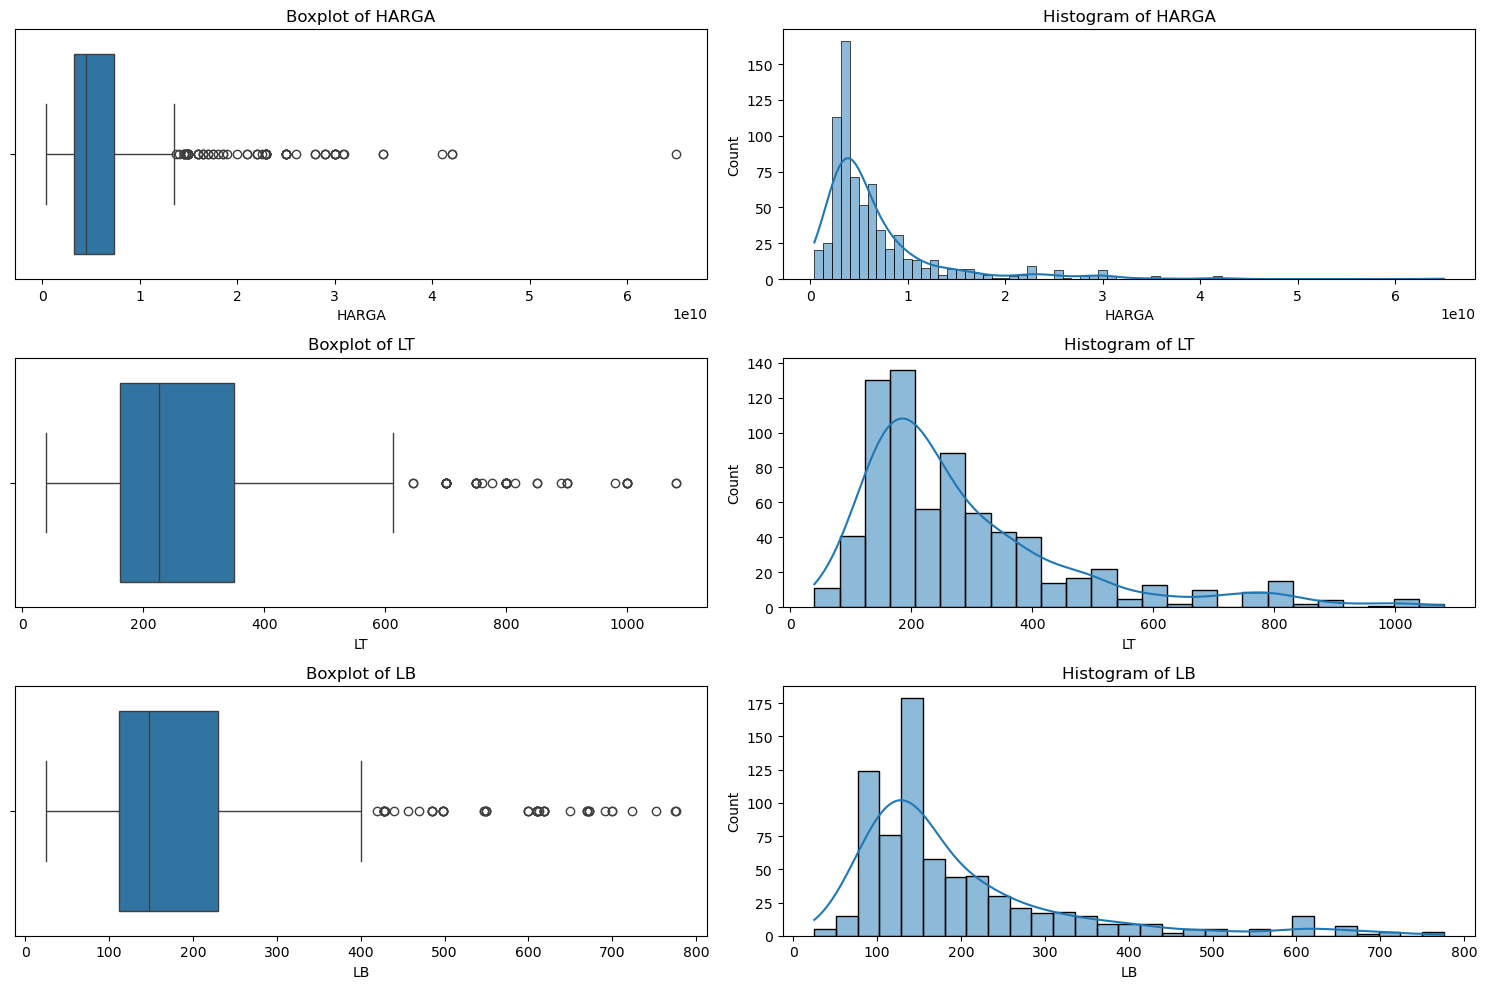

In [34]:
df_outlier = df.drop(columns=['NO','NAMA RUMAH'])
df_outlier = df_outlier[df_outlier['LB'] <= df_outlier['LT']]

fig, axes = plt.subplots(3, 2, figsize=(15, 10))
axes = axes.flatten()


for i, col in enumerate(df_outlier.columns[:len(axes)//2]):  
    
    sns.boxplot(ax=axes[2*i], x=df_outlier[col])
    axes[2*i].set_title(f"Boxplot of {col}")

    sns.histplot(ax=axes[2*i+1], x=df_outlier[col], kde=True)
    axes[2*i+1].set_title(f"Histogram of {col}")

plt.tight_layout()
plt.show()





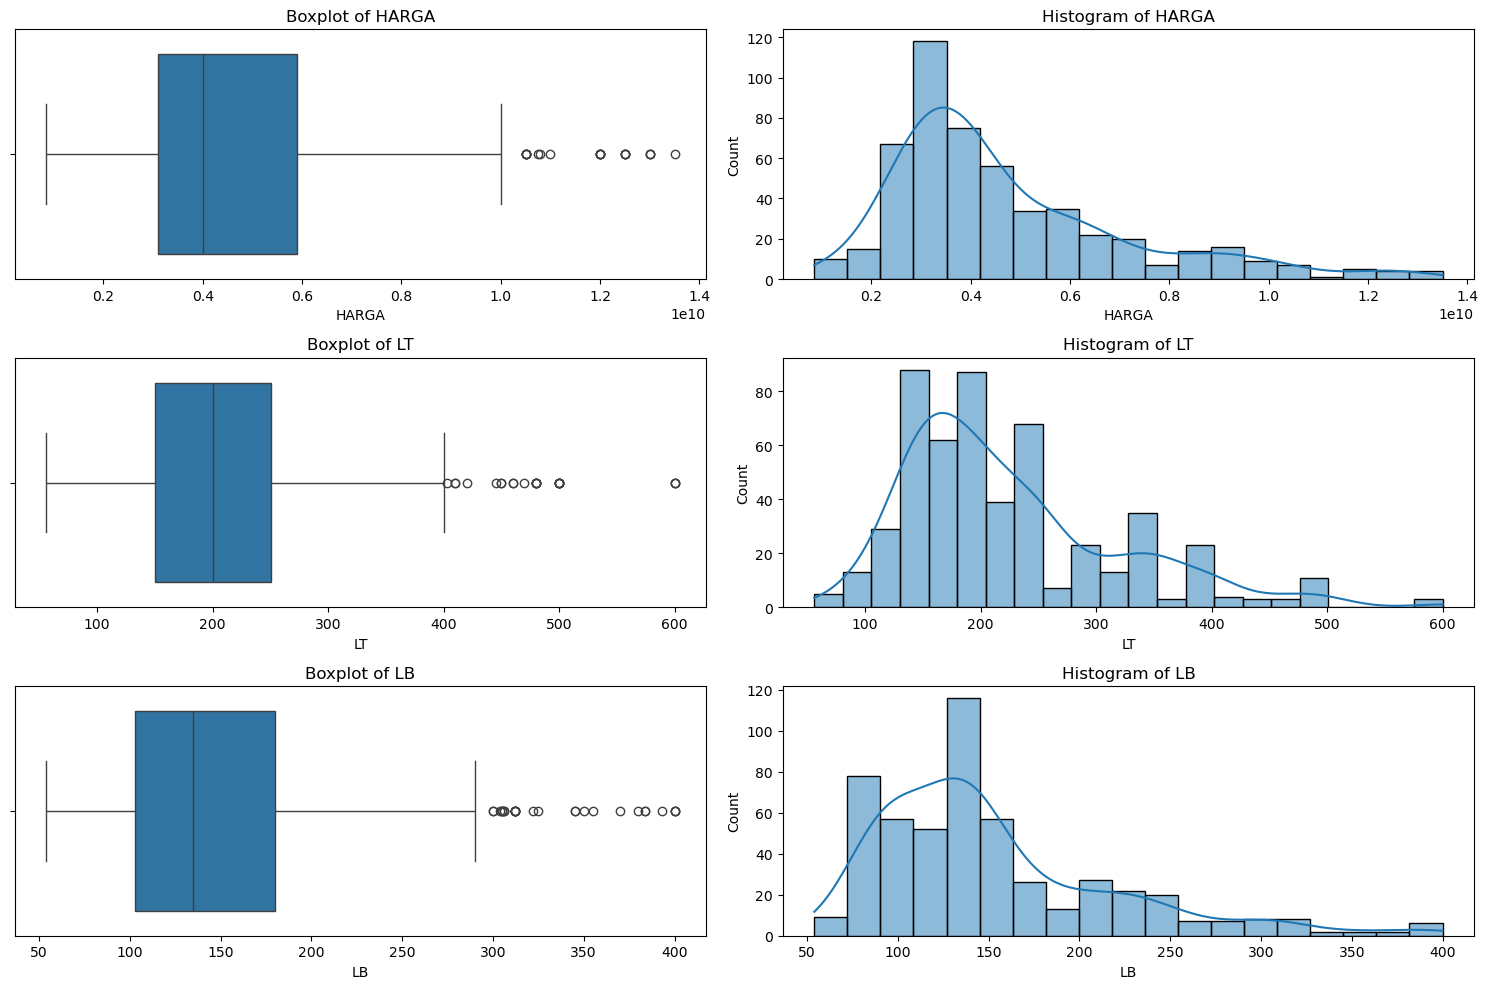

In [35]:

Q1 = df_outlier.quantile(0.25)
Q3 = df_outlier.quantile(0.75)
IQR = Q3 - Q1

lower_fance = Q1 - 1.5 * IQR
upper_fance = Q3 + 1.5 * IQR

condition = ~((df_outlier < lower_fance) | (df_outlier > upper_fance)).any(axis=1)
df_outlier = df_outlier.loc[condition]

fig, axes = plt.subplots(3, 2, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(df_outlier.columns[:len(axes)//2]):  
    
    sns.boxplot(ax=axes[2*i], x=df_outlier[col])
    axes[2*i].set_title(f"Boxplot of {col}")

    sns.histplot(ax=axes[2*i+1], x=df_outlier[col], kde=True)
    axes[2*i+1].set_title(f"Histogram of {col}")

plt.tight_layout()
plt.show()

# plt.figure(figsize=(20,5))
# plt.subplot(1,2,1)
# sns.boxplot(x=df_outlier)
# plt.title('boxplot harga')

# plt.subplot(1,2,2)
# sns.histplot(df_outlier, kde=True)
# plt.title('hitsplot harga')

In [36]:
df_outlier.describe().round(2)

,HARGA,LT,LB,KT,KM,GRS
count,5.190000e+02,519.00,519.00,519.00,519.00,519.00
mean,4.749456e+09,226.09,152.49,4.16,3.37,1.57
std,2.429253e+09,95.17,66.40,0.90,0.88,0.81
min,8.500000e+08,56.00,54.00,3.00,2.00,0.00
25%,3.100000e+09,150.00,103.00,3.00,3.00,1.00
50%,4.000000e+09,200.00,135.00,4.00,3.00,2.00
75%,5.900000e+09,250.50,180.00,5.00,4.00,2.00
max,1.350000e+10,600.00,400.00,6.00,5.00,3.00


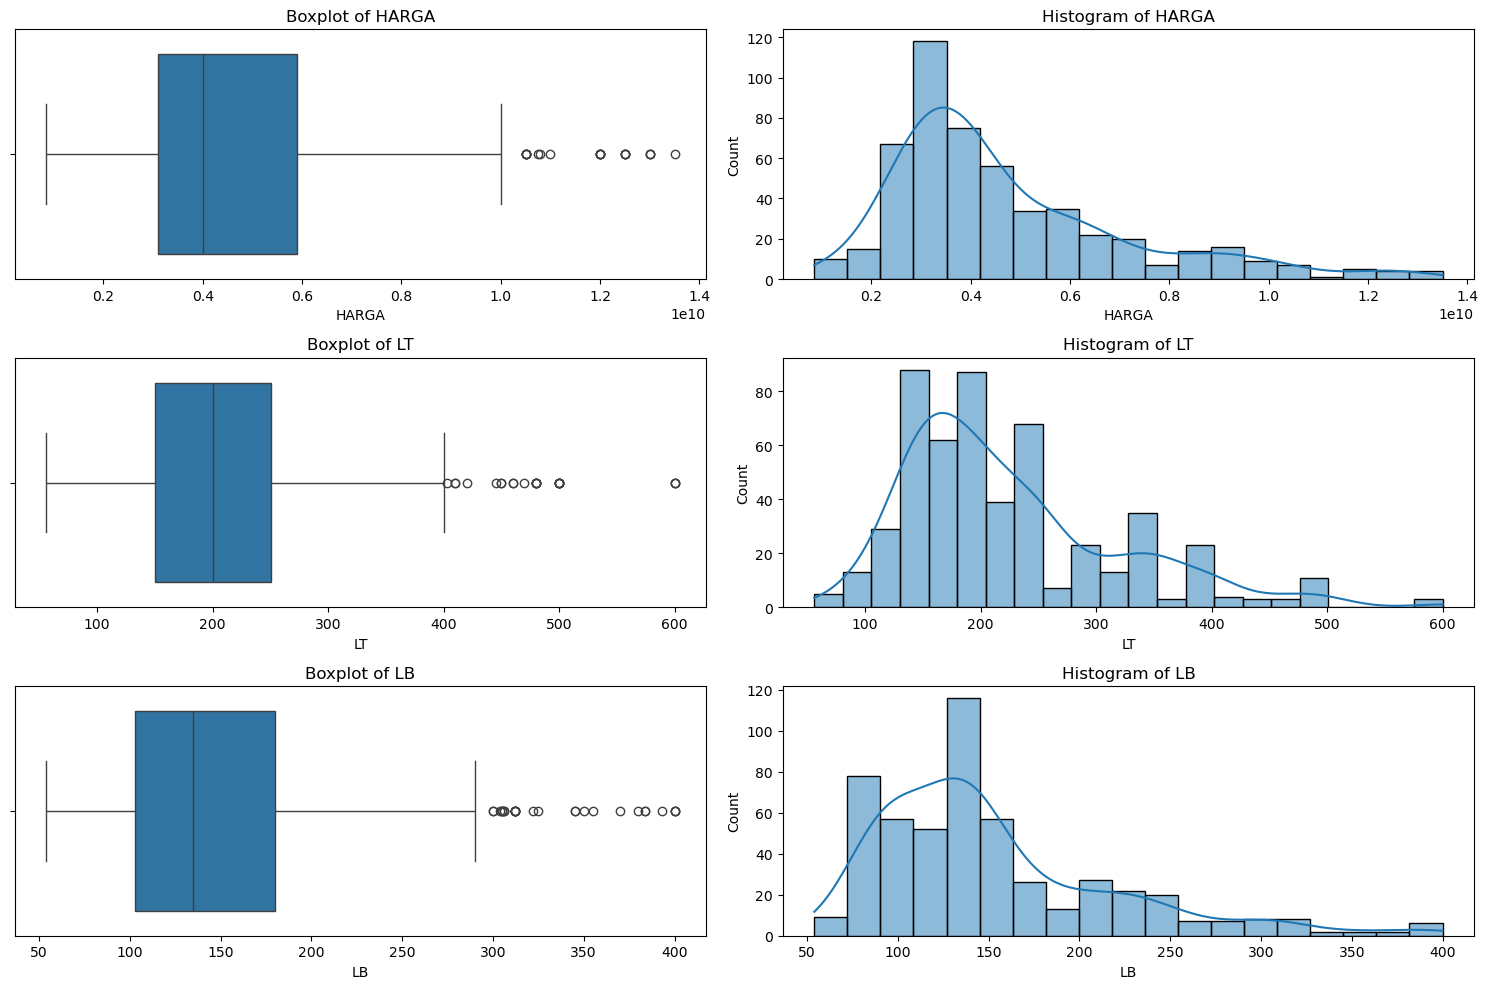

In [37]:
fig, axes = plt.subplots(3, 2, figsize=(15, 10))
axes = axes.flatten()


for i, col in enumerate(df_outlier.columns[:len(axes)//2]):  
    
    sns.boxplot(ax=axes[2*i], x=df_outlier[col])
    axes[2*i].set_title(f"Boxplot of {col}")

    sns.histplot(ax=axes[2*i+1], x=df_outlier[col], kde=True)
    axes[2*i+1].set_title(f"Histogram of {col}")

plt.tight_layout()
plt.show()

In [ ]:
df = df_outlier.copy()
x = df.drop(columns='HARGA')
y= df["HARGA"]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2 , random_state=1)

In [39]:
# Melatih model 1 dengan algoritma Least Angle Regression
from sklearn import linear_model
lars = linear_model.Lars(n_nonzero_coefs=1).fit(x_train, y_train)
     
# Melatih model 2 dengan algoritma Linear Regression
from sklearn.linear_model import LinearRegression
LR = LinearRegression().fit(x_train, y_train)
     
# Melatih model 3 dengan algoritma Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor(random_state=184)
GBR.fit(x_train, y_train)

,loss,'squared_error'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [40]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
 
# Evaluasi pada model LARS
pred_lars = lars.predict(x_test)
mae_lars = mean_absolute_error(y_test, pred_lars)
mse_lars = mean_squared_error(y_test, pred_lars)
r2_lars = r2_score(y_test, pred_lars)
 
# Membuat dictionary untuk menyimpan hasil evaluasi
data = {
    'MAE': [mae_lars],
    'MSE': [mse_lars],
    'R2': [r2_lars]
}

# Konversi dictionary menjadi DataFrame
df_results = pd.DataFrame(data, index=['Lars'])
df_results



,MAE,MSE,R2
Lars,1.209704e+09,2.825448e+18,0.488787


In [41]:
# Evaluasi pada model Linear Regression
pred_LR = LR.predict(x_test)
mae_LR = mean_absolute_error(y_test, pred_LR)
mse_LR = mean_squared_error(y_test, pred_LR)
r2_LR = r2_score(y_test, pred_LR)
     
# Menambahkan hasil evaluasi LR ke DataFrame
df_results.loc['Linear Regression'] = [mae_LR, mse_LR, r2_LR]
df_results

,MAE,MSE,R2
Lars,1.209704e+09,2.825448e+18,0.488787
Linear Regression,9.480186e+08,1.684857e+18,0.695156


In [42]:
# Evaluasi pada model Gradient Boosting Regressor
pred_GBR = GBR.predict(x_test)
mae_GBR = mean_absolute_error(y_test, pred_GBR)
mse_GBR = mean_squared_error(y_test, pred_GBR)
r2_GBR = r2_score(y_test, pred_GBR)
     
# Menambahkan hasil evaluasi GBR ke DataFrame
df_results.loc['GradientBoostingRegressor'] = [mae_GBR, mse_GBR, r2_GBR]
df_results

,MAE,MSE,R2
Lars,1.209704e+09,2.825448e+18,0.488787
Linear Regression,9.480186e+08,1.684857e+18,0.695156
GradientBoostingRegressor,9.648820e+08,1.737344e+18,0.685659


In [43]:
import joblib
 
# Menyimpan model ke dalam file
joblib.dump(LR, 'lr_model.joblib')

['lr_model.joblib']